# Does higher Population equal a higher GDP?
## What country has the highest GPD Per Capita?
### Avr. GDP Per Capita for the past 10 years?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 10

1. - Load the csv file with the Population Data
 - Select the columns to be used and rename the index
 - Rename the index in order to be able to merge the tables later

In [3]:
Population = pd.read_csv("WPP2019_TotalPopulationBySex.csv",thousands=',', index_col= "Location").dropna()
pop = Population
#pop = Population[[ "Time", "PopTotal"]]
pop.index.rename('Country Name', inplace=True)
pop = pop.reset_index()
pop

,Country Name,LocID,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,Afghanistan,4,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,Afghanistan,4,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,Afghanistan,4,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,Afghanistan,4,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,Afghanistan,4,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486
...,...,...,...,...,...,...,...,...,...,...
250871,Zimbabwe,716,207,Lower 95 PI,2080,2080.5,10576.533,11255.983,21836.893,56.448
250872,Zimbabwe,716,207,Lower 95 PI,2085,2085.5,10293.349,11050.875,21355.988,55.205
250873,Zimbabwe,716,207,Lower 95 PI,2090,2090.5,9920.336,10767.709,20689.956,53.483
250874,Zimbabwe,716,207,Lower 95 PI,2095,2095.5,9503.711,10412.184,19892.080,51.421


2. - Select the columns we need from the population data set

In [6]:
pop = pop[[ "Time", "PopTotal"]]
pop


,Time,PopTotal
Country Name,,
Afghanistan,1950,7752.117
Afghanistan,1951,7840.151
Afghanistan,1952,7935.996
Afghanistan,1953,8039.684
Afghanistan,1954,8151.316
...,...,...
Zimbabwe,2080,21836.893
Zimbabwe,2085,21355.988
Zimbabwe,2090,20689.956


3. - Change the Name of some of the countries to match the other data set

In [153]:

dict = {'Republic of Korea':"South Korea",
        'United States of America': "United States",
        'United Kingdom of Great Britain and Northern Ireland': "United Kingdom",
        'Bahamas': "The Bahamas"}
pop["Country Name"] = pop["Country Name"].replace(dict)


4. - Load the csv file with the GDP Data

In [7]:
countriesGDP = pd.read_csv("GDP2011-2019.csv",thousands=',', index_col= "Country Name")
countriesGDP

,Series Name,Series Code,Country Code,1990 [YR1990],2000 [YR2000],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
Country Name,,,,,,,,,,,,,,,
Afghanistan,GDP (current US$),NY.GDP.MKTP.CD,AFG,..,..,17804292964.1045,20001598505.7042,20561069558.2152,20484885119.7348,19907111418.9938,19362642266.6484,20191760000.0587,19484384936.6312,19101353832.7371,..
Albania,GDP (current US$),NY.GDP.MKTP.CD,ALB,2028553750,3480355188.60063,12890765324.2256,12319830252.4768,12776217194.7928,13228144008.3428,11386846319.1589,11861200797.4707,13019693450.8816,15147020535.3869,15278077446.8643,..
Algeria,GDP (current US$),NY.GDP.MKTP.CD,DZA,62045099642.7774,54788732394.3662,200019468616.453,209060307470.078,209754763860.68,213808808746.696,165979418301.861,160033844070.572,167389364980.671,173757952824.25,169988236398.126,..
American Samoa,GDP (current US$),NY.GDP.MKTP.CD,ASM,..,..,574000000,644000000,641000000,642000000,661000000,652000000,602000000,636000000,..,..
Andorra,GDP (current US$),NY.GDP.MKTP.CD,AND,1029048481.88051,1429049198.45218,3629203786.19154,3188808942.56713,3193704343.20627,3271808157.30039,2789870187.50693,2896679211.86628,3000180750.11297,3218316013.22626,3154057987.23833,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


5. - Rename the columns so it matches the data in the population data set

In [13]:

countriesGDP = countriesGDP.rename(columns= {'2011 [YR2011]':'2011', '2012 [YR2012]':'2012',
                                             '2013 [YR2013]':'2013', '2014 [YR2014]':'2014',
                                             '2015 [YR2015]':'2015', '2016 [YR2016]':'2016',
                                             '2017 [YR2017]':'2017', '2018 [YR2018]':'2018',
                                             '2019 [YR2019]':'2019'})  

6. - Replace non numeric entries with NaN
 - Reset index and select the columns that will be used to analyse the data
 - Drop any null values, countries with no infromation will not be considered

In [14]:
countriesGDP =  countriesGDP.replace('..',np.nan)
countriesGDP = countriesGDP.reset_index()
countriesGDP = countriesGDP[["Country Name", "2011","2012","2013","2014","2015",
                             "2016","2017","2018","2019"]]
GDP = countriesGDP.dropna()
GDP

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,17804292964.1045,20001598505.7042,20561069558.2152,20484885119.7348,19907111418.9938,19362642266.6484,20191760000.0587,19484384936.6312,19101353832.7371
1,Albania,12890765324.2256,12319830252.4768,12776217194.7928,13228144008.3428,11386846319.1589,11861200797.4707,13019693450.8816,15147020535.3869,15278077446.8643
2,Algeria,200019468616.453,209060307470.078,209754763860.68,213808808746.696,165979418301.861,160033844070.572,167389364980.671,173757952824.25,169988236398.126
4,Andorra,3629203786.19154,3188808942.56713,3193704343.20627,3271808157.30039,2789870187.50693,2896679211.86628,3000180750.11297,3218316013.22626,3154057987.23833
5,Angola,111789686464.441,128052853643.106,136709862831.194,145712200312.505,116193649124.151,101123851090.455,122123822333.591,101353230784.594,94635415869.9851
...,...,...,...,...,...,...,...,...,...,...
208,Uzbekistan,56516280748.3777,63628854498.5024,68997168337.6782,76658542757.4707,81847410181.7953,81779012350.8833,59159945320.5667,50392607758.2324,57921286440.3495
209,Vanuatu,792149700.679116,781702874.106058,801787555.861121,814954306.971033,759689950.930918,804332795.575017,880043553.748442,906050106.972695,917058850.816563
211,Vietnam,135539438559.709,155820001920.492,171222025117.381,186204652922.262,193241108709.536,205276172134.901,223779865815.183,245213686369.157,261921244843.172
215,Zambia,23459515275.5776,25503060420.026,28045512870.8834,27150646908.7245,21243347377.3226,20954761767.1586,25868142076.7897,27005238896.1666,23064722446.3513


7. - Use melt to take all the years and convert them into values.  Then set the datatypes as it corresponds.

In [15]:
gdp = pd.melt(GDP,id_vars = ['Country Name'],value_vars=['2011','2012','2013','2014','2015','2016','2017','2018','2019'], var_name = 'Time', value_name='GDP')


gdp['Time']=gdp['Time'].astype(int)
gdp['GDP'] = gdp['GDP'].apply(pd.to_numeric)
#gdp = gdp.dropna()

gdp

,Country Name,Time,GDP
0,Afghanistan,2011,1.780429e+10
1,Albania,2011,1.289077e+10
2,Algeria,2011,2.000195e+11
3,Andorra,2011,3.629204e+09
4,Angola,2011,1.117897e+11
...,...,...,...
1606,Uzbekistan,2019,5.792129e+10
1607,Vanuatu,2019,9.170589e+08
1608,Vietnam,2019,2.619212e+11
1609,Zambia,2019,2.306472e+10


8. - Merge the two tables. pop and gdp using the Time column and inner join. 
 - Create a new column called Per_Capita_GDP - Divide GDP with Population total



In [16]:
merged = pd.merge(gdp, pop, how='left', on=['Country Name', 'Time'])

merged["PER_CAPITA_GDP"] = merged["GDP"]/merged["PopTotal"]
#merged = merged.set_index('Country Name', 'Time')

merged = merged.dropna()
merged

,Country Name,Time,GDP,PopTotal,PER_CAPITA_GDP
0,Afghanistan,2011,1.780429e+10,30117.411,5.911628e+05
1,Albania,2011,1.289077e+10,2928.601,4.401680e+06
2,Algeria,2011,2.000195e+11,36661.438,5.455854e+06
4,Angola,2011,1.117897e+11,24220.660,4.615468e+06
5,Antigua and Barbuda,2011,1.137637e+09,89.250,1.274663e+07
...,...,...,...,...,...
1605,Uruguay,2019,5.604591e+10,3461.731,1.619014e+07
1606,Uzbekistan,2019,5.792129e+10,32981.715,1.756164e+06
1607,Vanuatu,2019,9.170589e+08,299.882,3.058066e+06
1609,Zambia,2019,2.306472e+10,17861.034,1.291343e+06


9. - Then pivot the table to make the country and the years grouped.
   - The data is sorted by GDP highest to lowest value. 
   - Selecting the top 10 countries 
   - Unstack the data since each column has different large data numbers
   - Transpose the data in order to visualize time

In [24]:
merged1 = merged.pivot_table(index=['Country Name','Time']).sort_values('GDP', ascending = False)[:90]

G = merged1.unstack()['GDP']
P = merged1.unstack()['PopTotal']
C = merged1.unstack()['PER_CAPITA_GDP']
g = G.T
p = P.T
c = C.T
merged1


GDP  PER_CAPITA_GDP     PopTotal
Country Name       Time                                           
China              2019  1.434290e+13    1.000353e+07  1433783.692
                   2018  1.389482e+13    9.732665e+06  1427647.789
                   2017  1.231041e+13    8.663068e+06  1421021.794
                   2016  1.123328e+13    7.944049e+06  1414049.353
                   2015  1.106155e+13    7.862650e+06  1406847.868
...                               ...             ...          ...
Australia          2013  1.576184e+12    6.777856e+07    23254.912
Russian Federation 2017  1.574199e+12    1.081700e+07   145530.091
Canada             2015  1.556130e+12    4.319382e+07    36026.668
Australia          2012  1.546152e+12    6.750590e+07    22903.951
Canada             2016  1.528243e+12    4.200439e+07    36382.942

[90 rows x 3 columns]

In [25]:
G

Time,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,
China,7.551500e+12,8.532231e+12,9.570406e+12,1.047568e+13,1.106155e+13,1.123328e+13,1.231041e+13,1.389482e+13,1.434290e+13
Japan,6.157460e+12,6.203213e+12,5.155717e+12,4.850414e+12,4.389476e+12,4.922538e+12,4.866864e+12,4.954807e+12,5.081770e+12
Germany,3.744409e+12,3.527345e+12,3.732743e+12,3.883920e+12,3.360550e+12,3.466790e+12,3.665804e+12,3.949549e+12,3.845630e+12
United Kingdom,2.659310e+12,2.704888e+12,2.786023e+12,3.063803e+12,2.928591e+12,2.694283e+12,2.666229e+12,2.860668e+12,2.827113e+12
India,1.823050e+12,1.827638e+12,1.856722e+12,2.039127e+12,2.103588e+12,2.294798e+12,2.652755e+12,2.713165e+12,2.875142e+12
...,...,...,...,...,...,...,...,...,...
Brazil,2.616201e+12,2.465189e+12,2.472807e+12,2.455994e+12,1.802214e+12,1.795700e+12,2.062831e+12,1.885483e+12,1.839758e+12
Russian Federation,2.045926e+12,2.208296e+12,2.292473e+12,2.059242e+12,NaN,NaN,1.574199e+12,1.669583e+12,1.699877e+12
Italy,2.291991e+12,2.087077e+12,2.141315e+12,2.159134e+12,1.835899e+12,1.875797e+12,1.961796e+12,2.085764e+12,2.001244e+12


In [26]:
g

Country Name,China,Japan,Germany,United Kingdom,India,France,Brazil,Russian Federation,Italy,Canada,Australia
Time,,,,,,,,,,,
2011,7.551500e+12,6.157460e+12,3.744409e+12,2.659310e+12,1.823050e+12,2.861408e+12,2.616201e+12,2.045926e+12,2.291991e+12,1.788648e+12,NaN
2012,8.532231e+12,6.203213e+12,3.527345e+12,2.704888e+12,1.827638e+12,2.683825e+12,2.465189e+12,2.208296e+12,2.087077e+12,1.828689e+12,1.546152e+12
2013,9.570406e+12,5.155717e+12,3.732743e+12,2.786023e+12,1.856722e+12,2.811078e+12,2.472807e+12,2.292473e+12,2.141315e+12,1.847209e+12,1.576184e+12
2014,1.047568e+13,4.850414e+12,3.883920e+12,3.063803e+12,2.039127e+12,2.852166e+12,2.455994e+12,2.059242e+12,2.159134e+12,1.803533e+12,NaN
2015,1.106155e+13,4.389476e+12,3.360550e+12,2.928591e+12,2.103588e+12,2.438208e+12,1.802214e+12,NaN,1.835899e+12,1.556130e+12,NaN
2016,1.123328e+13,4.922538e+12,3.466790e+12,2.694283e+12,2.294798e+12,2.471286e+12,1.795700e+12,NaN,1.875797e+12,1.528243e+12,NaN
2017,1.231041e+13,4.866864e+12,3.665804e+12,2.666229e+12,2.652755e+12,2.595151e+12,2.062831e+12,1.574199e+12,1.961796e+12,1.649878e+12,NaN
2018,1.389482e+13,4.954807e+12,3.949549e+12,2.860668e+12,2.713165e+12,2.787864e+12,1.885483e+12,1.669583e+12,2.085764e+12,1.716263e+12,NaN
2019,1.434290e+13,5.081770e+12,3.845630e+12,2.827113e+12,2.875142e+12,2.715518e+12,1.839758e+12,1.699877e+12,2.001244e+12,1.736426e+12,NaN


10. - Use plot to graph the data
    - Use bar graphs and line graphs
    - Give proper names to the graphs and x and y labels

[Text(0, 0.5, 'USD'), Text(0.5, 0, 'Time')]

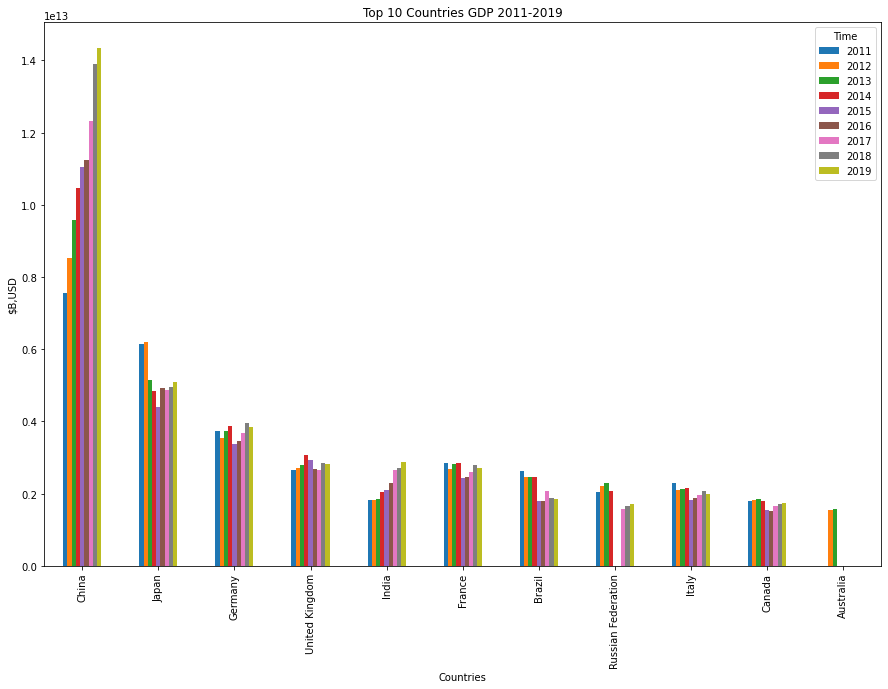

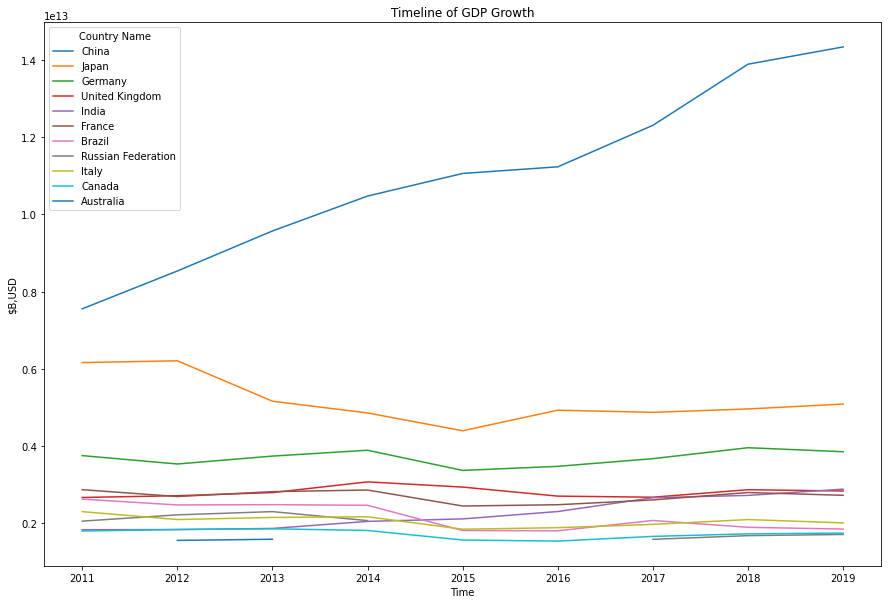

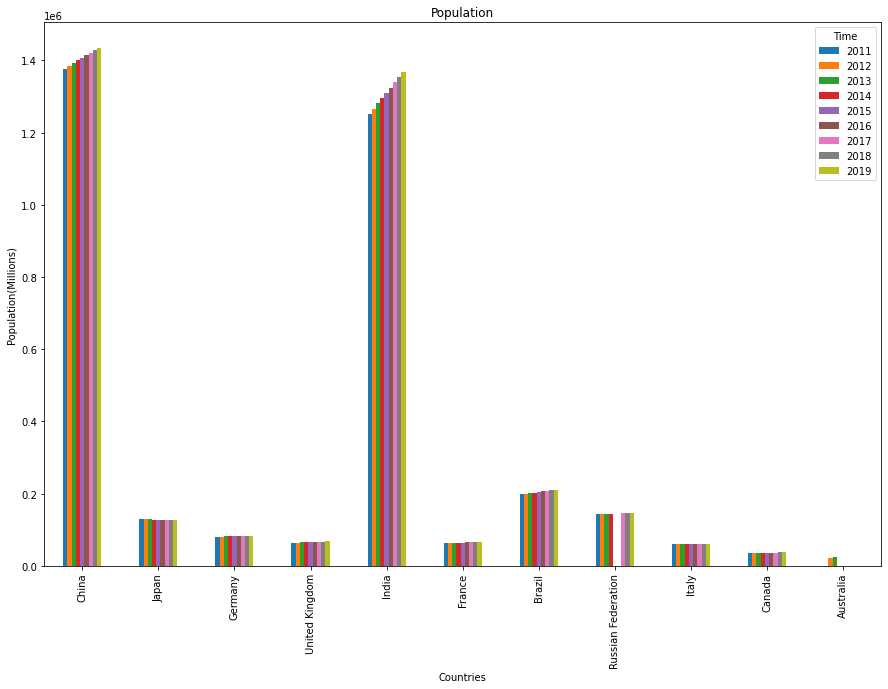

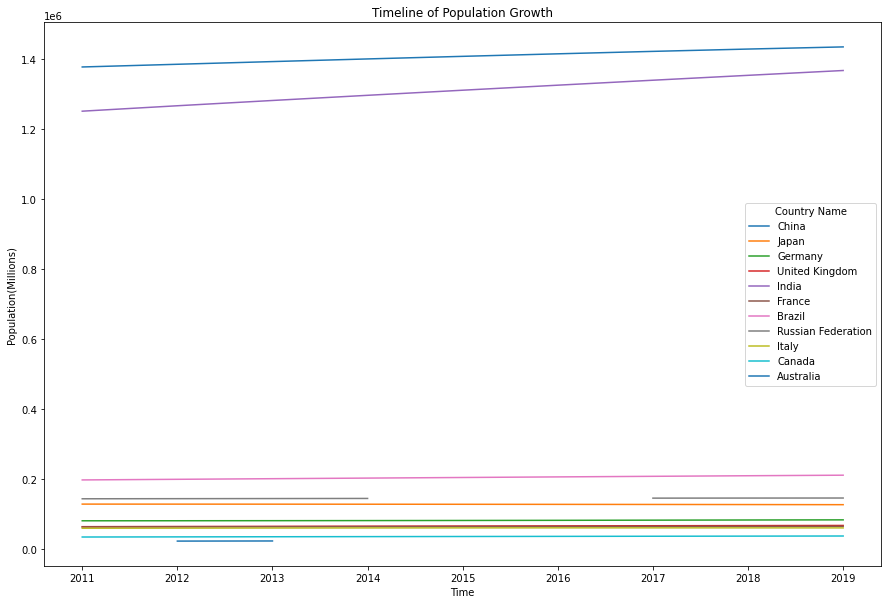

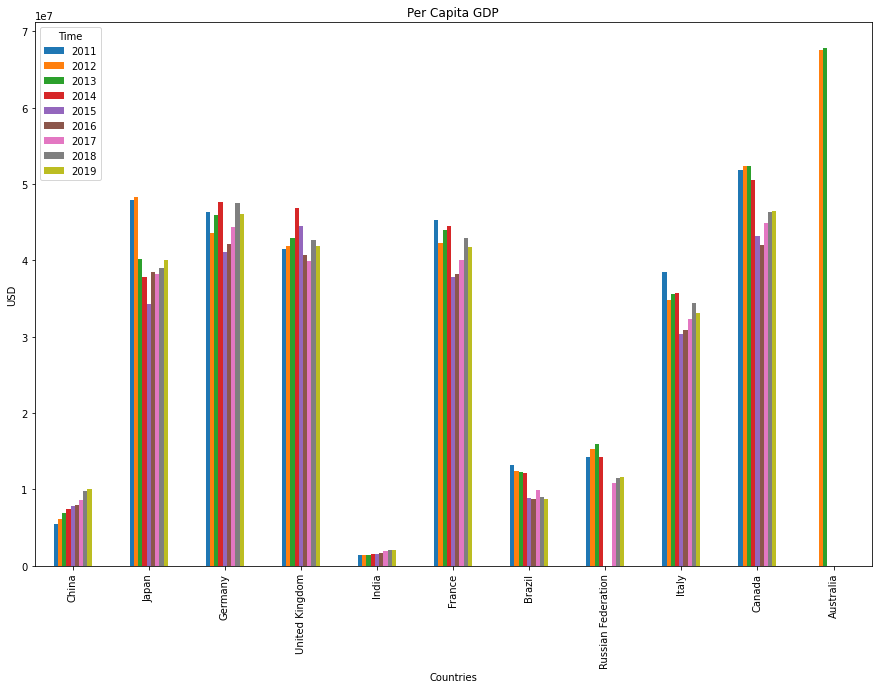

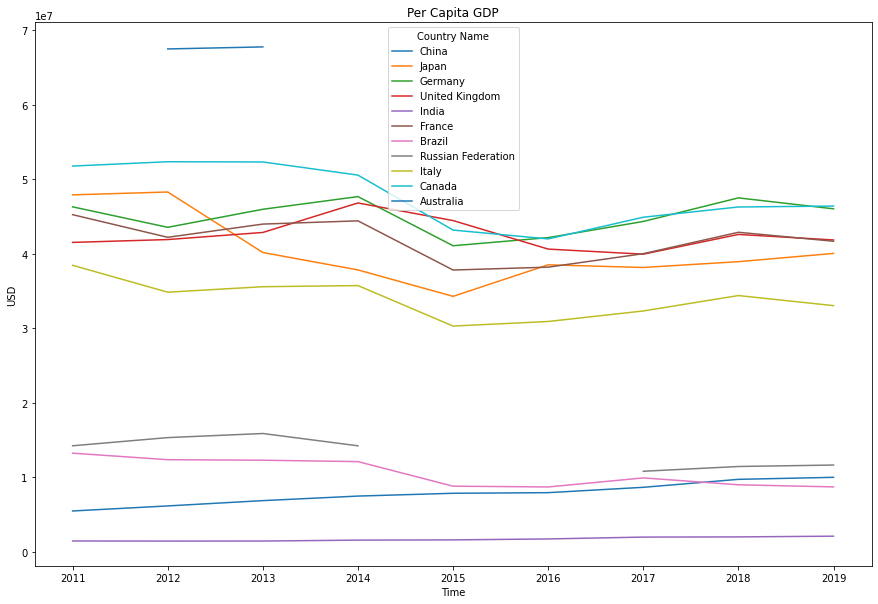

In [27]:
G.plot.bar(title = 'Top 10 Countries GDP 2011-2019', figsize=(15,10)).set(xlabel='Countries',ylabel='$B,USD')
g.plot.line(title = 'Timeline of GDP Growth', figsize=(15,10)).set(xlabel='Time',ylabel='$B,USD')
P.plot.bar(title = 'Population', figsize=(15,10)).set(xlabel='Countries',ylabel='Population(Millions)')
p.plot.line(title = 'Timeline of Population Growth',figsize=(15,10)).set(xlabel='Time',ylabel='Population(Millions)')
C.plot.bar(title = 'Per Capita GDP',figsize=(15,10)).set(xlabel='Countries',ylabel='USD')
c.plot.line(title = 'Per Capita GDP',figsize=(15,10)).set(xlabel='Time',ylabel='USD')

10. - Create new dataframe as before but this time sorted by Population 
- Repeat unstack and T processes to prepare data for visualization

In [28]:
mergedPopsort = merged.pivot_table(index=['Country Name','Time']).sort_values('PopTotal', ascending = False)[:90]

Gdp = mergedPopsort.unstack()['GDP']
Pop = mergedPopsort.unstack()['PopTotal']
Cap = mergedPopsort.unstack()['PER_CAPITA_GDP']
gDP = Gdp.T
pOP = Pop.T
cAP = Cap.T
mergedPopsort

GDP  PER_CAPITA_GDP     PopTotal
Country Name Time                                           
China        2019  1.434290e+13    1.000353e+07  1433783.692
             2018  1.389482e+13    9.732665e+06  1427647.789
             2017  1.231041e+13    8.663068e+06  1421021.794
             2016  1.123328e+13    7.944049e+06  1414049.353
             2015  1.106155e+13    7.862650e+06  1406847.868
...                         ...             ...          ...
Mexico       2015  1.170565e+12    9.605953e+06   121858.251
             2014  1.314564e+12    1.092238e+07   120355.137
             2013  1.274443e+12    1.072518e+07   118827.158
             2012  1.201090e+12    1.024173e+07   117274.156
             2011  1.180490e+12    1.020342e+07   115695.468

[90 rows x 3 columns]

[Text(0, 0.5, 'USD'), Text(0.5, 0, 'Time')]

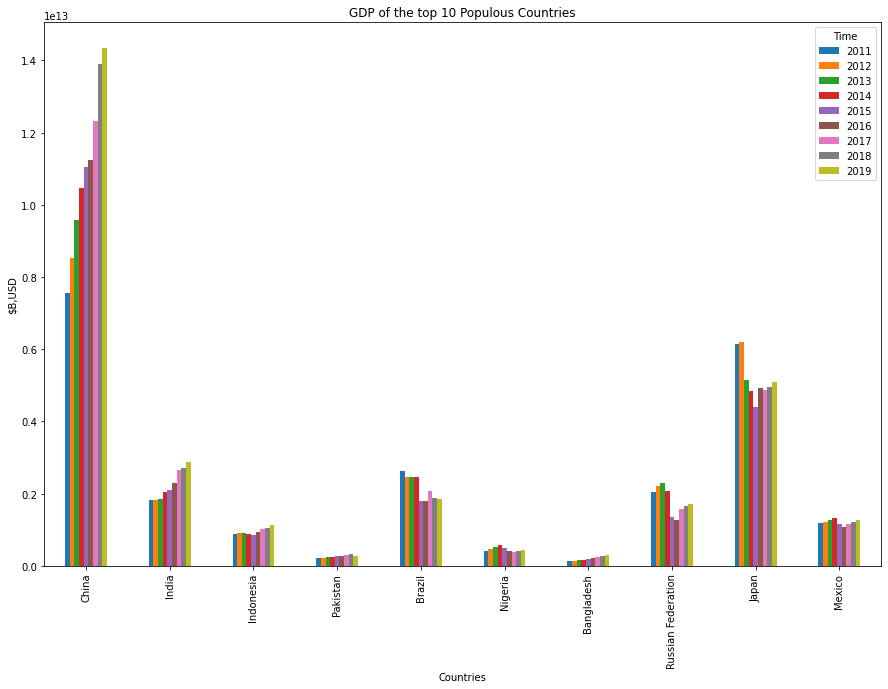

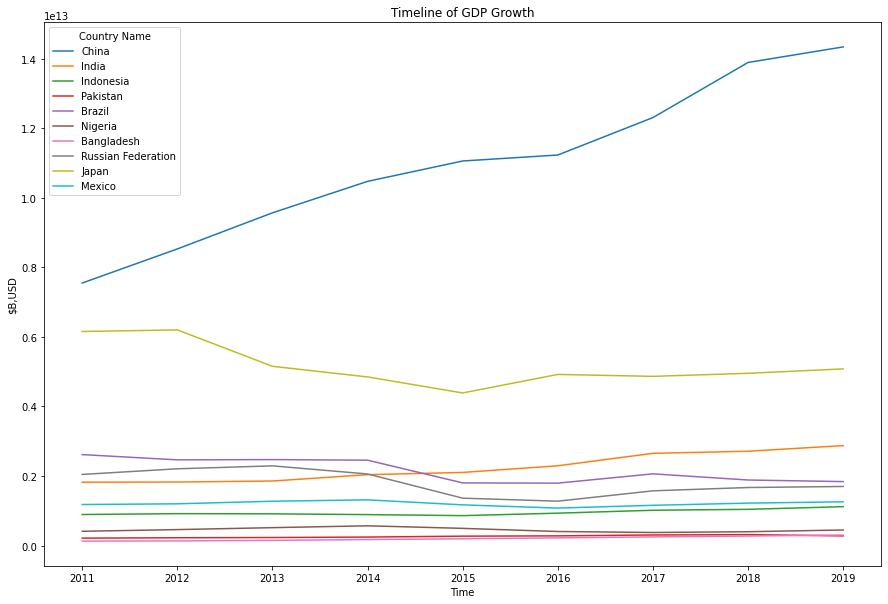

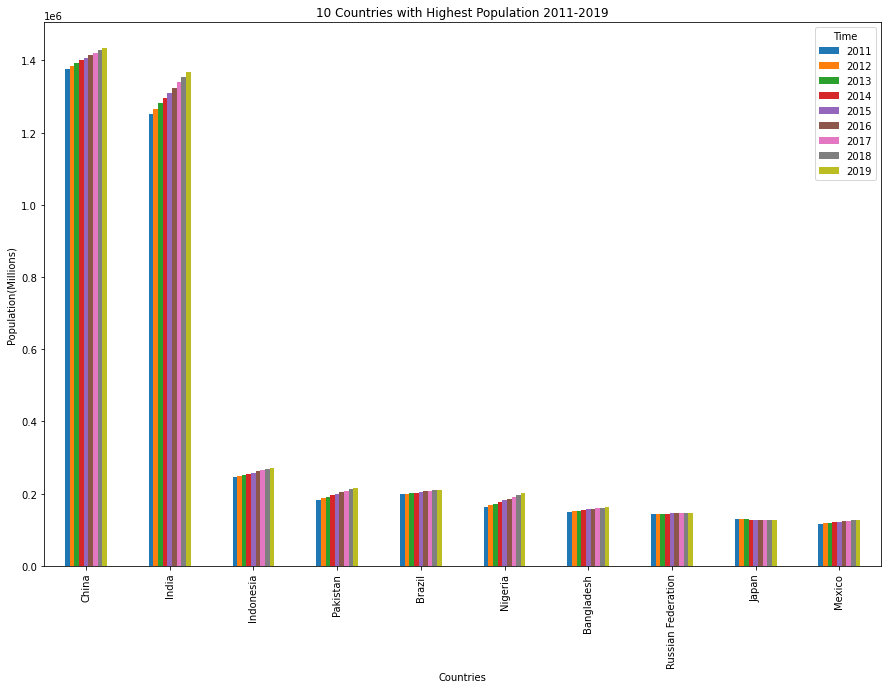

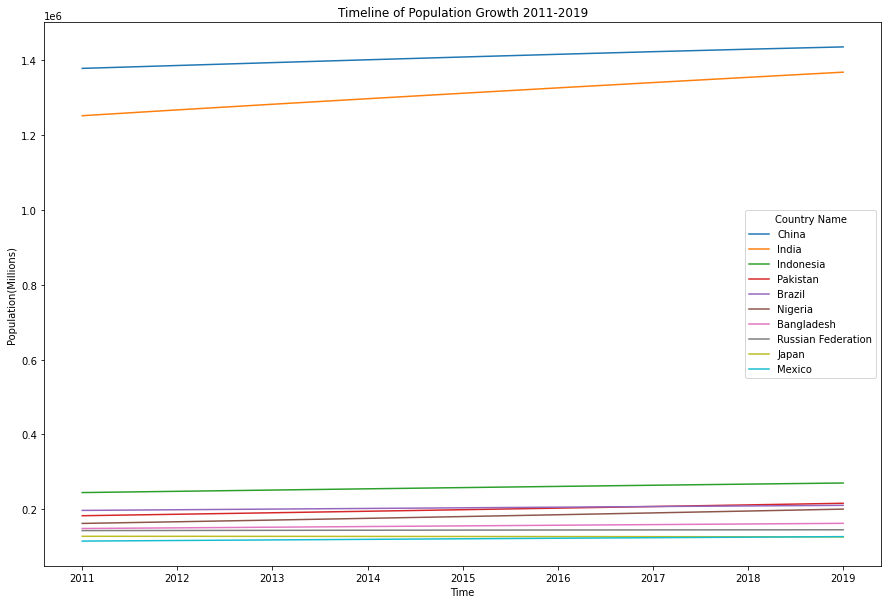

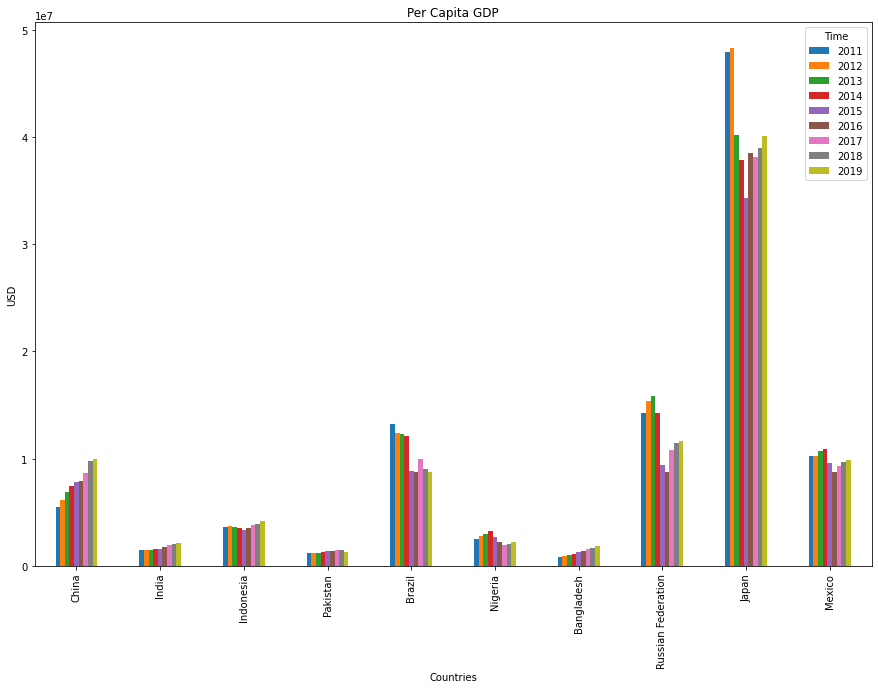

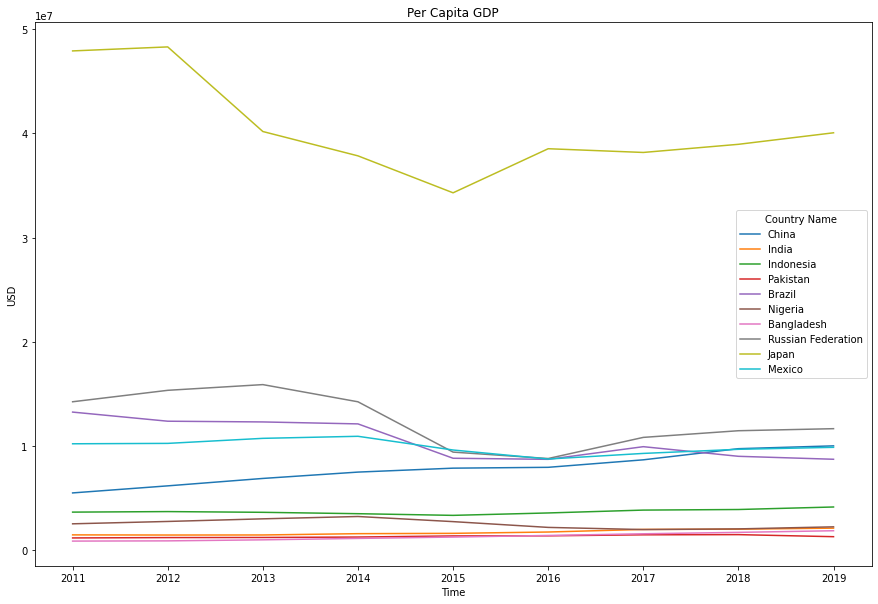

In [29]:
Gdp.plot.bar(title = 'GDP of the top 10 Populous Countries', figsize=(15,10)).set(xlabel='Countries',ylabel='$B,USD')
gDP.plot.line(title = 'Timeline of GDP Growth', figsize=(15,10)).set(xlabel='Time',ylabel='$B,USD')
Pop.plot.bar(title = '10 Countries with Highest Population 2011-2019', figsize=(15,10)).set(xlabel='Countries',ylabel='Population(Millions)')
pOP.plot.line(title = 'Timeline of Population Growth 2011-2019',figsize=(15,10)).set(xlabel='Time',ylabel='Population(Millions)')
Cap.plot.bar(title = 'Per Capita GDP',figsize=(15,10)).set(xlabel='Countries',ylabel='USD')
cAP.plot.line(title = 'Per Capita GDP',figsize=(15,10)).set(xlabel='Time',ylabel='USD')

11. - Create data frame following previous steps sorted by Per_Capita_GDP


In [30]:
permerged1 = merged.pivot_table(index=['Country Name','Time']).sort_values('PER_CAPITA_GDP', ascending = False)[:90]

perG = permerged1.unstack()['GDP']
perP = permerged1.unstack()['PopTotal']
perC = permerged1.unstack()['PER_CAPITA_GDP']
perg = perG.T
perp = perP.T
perc = perC.T
permerged1

GDP  PER_CAPITA_GDP   PopTotal
Country Name Time                                         
Luxembourg   2014  6.610385e+10    1.192109e+08    554.512
             2018  7.091996e+10    1.173697e+08    604.244
             2011  6.000463e+10    1.155464e+08    519.312
             2019  7.110492e+10    1.154807e+08    615.730
             2013  6.173935e+10    1.137939e+08    542.554
...                         ...             ...        ...
Sweden       2016  5.156547e+11    5.242523e+07   9836.003
Canada       2012  1.828689e+12    5.236492e+07  34922.031
             2013  1.847209e+12    5.233399e+07  35296.535
Netherlands  2013  8.769235e+11    5.206299e+07  16843.512
Kuwait       2012  1.740704e+11    5.197912e+07   3348.852

[90 rows x 3 columns]

[Text(0, 0.5, 'USD'), Text(0.5, 0, 'Time')]

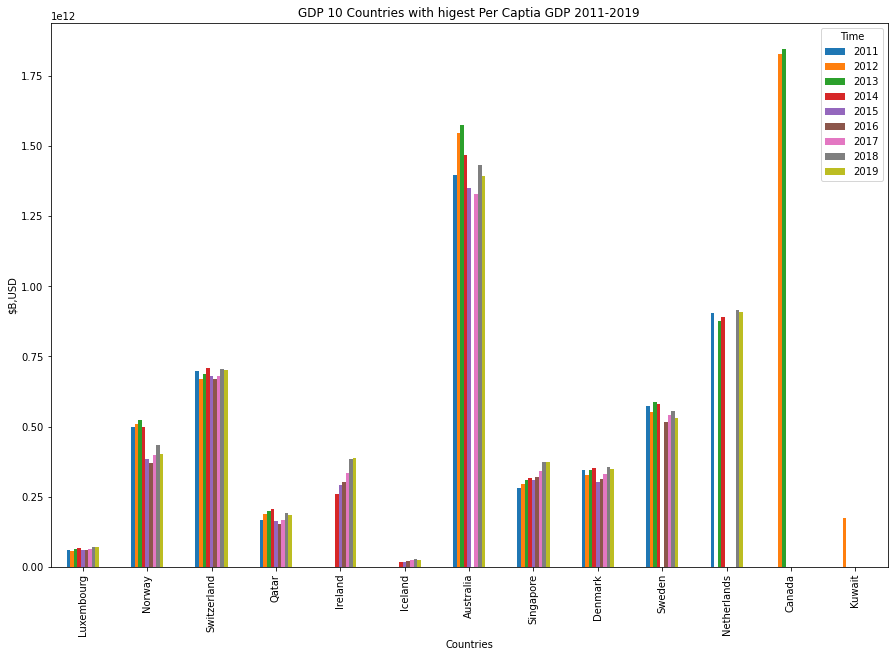

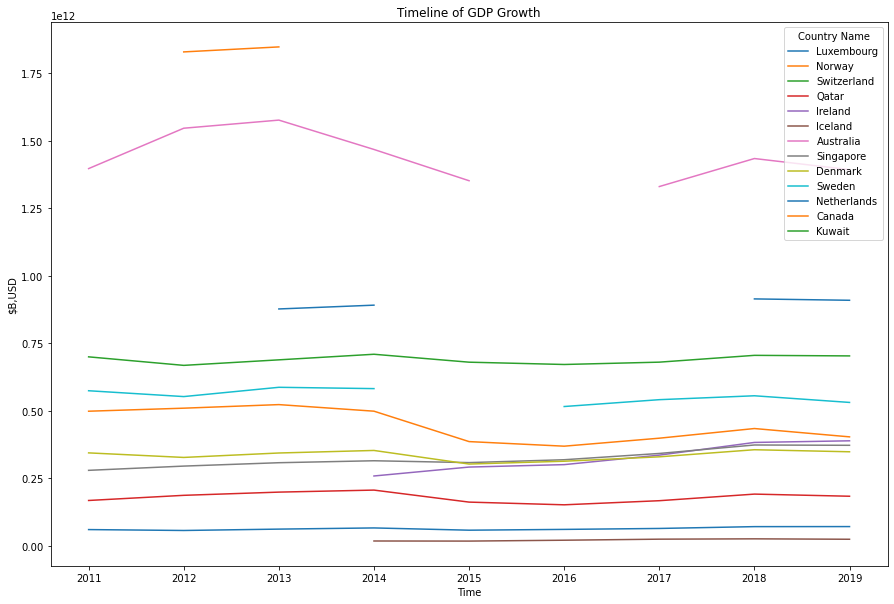

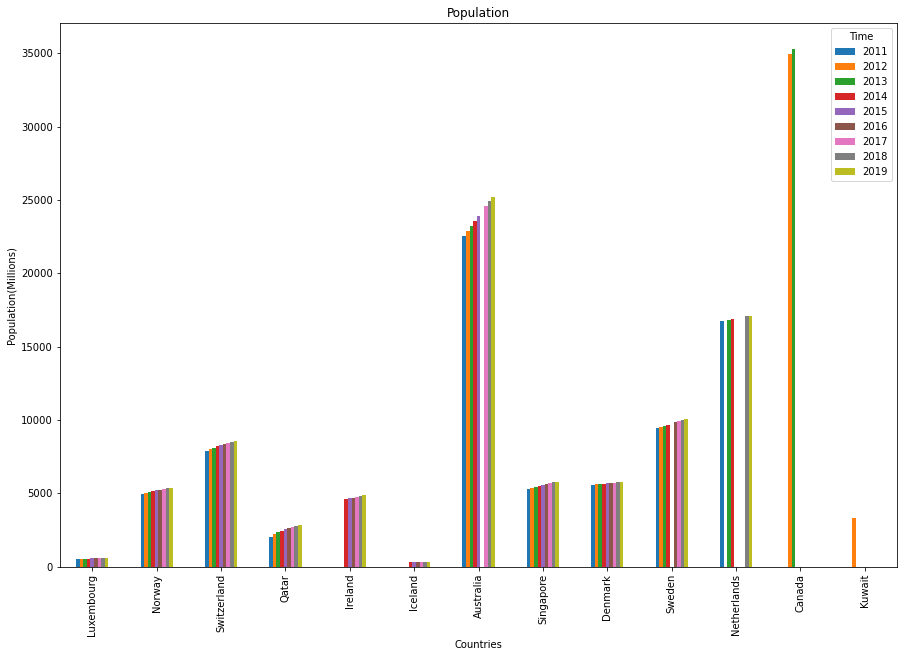

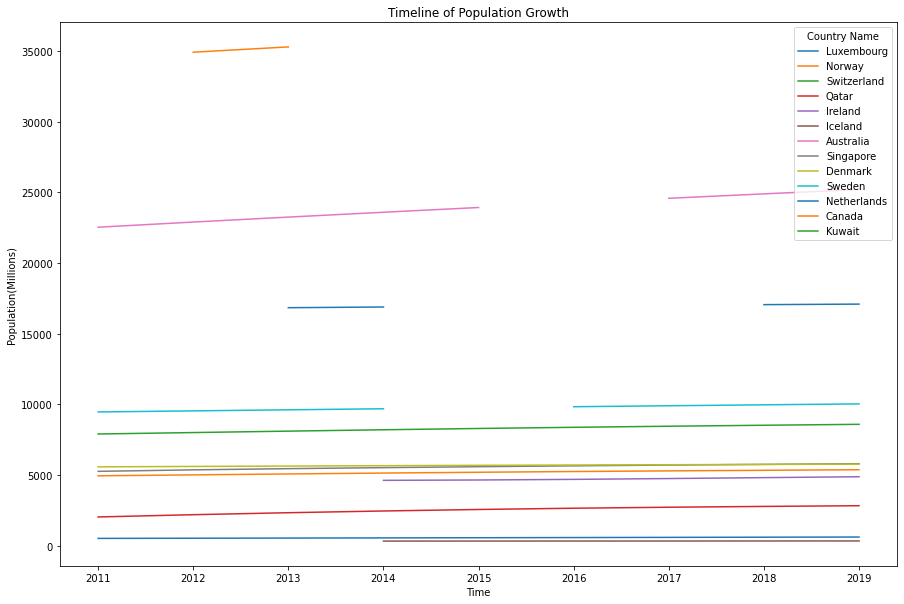

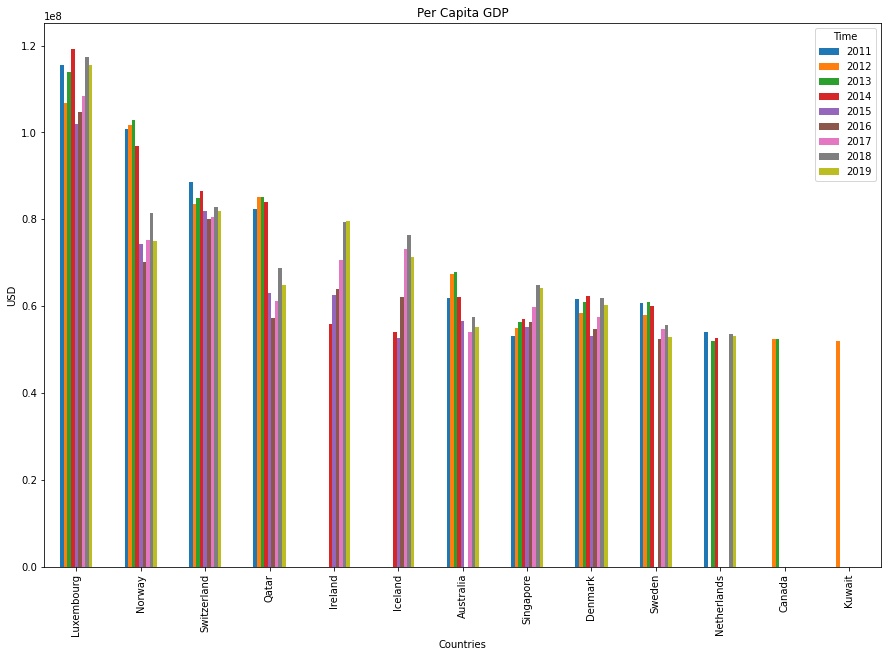

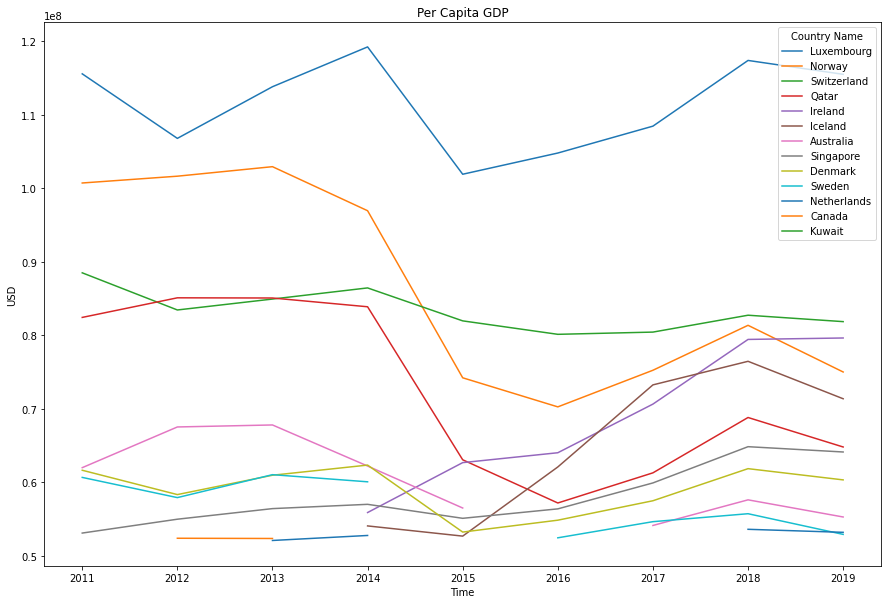

In [31]:
perG.plot.bar(title = 'GDP 10 Countries with higest Per Captia GDP 2011-2019', figsize=(15,10)).set(xlabel='Countries',ylabel='$B,USD')
perg.plot.line(title = 'Timeline of GDP Growth', figsize=(15,10)).set(xlabel='Time',ylabel='$B,USD')
perP.plot.bar(title = 'Population', figsize=(15,10)).set(xlabel='Countries',ylabel='Population(Millions)')
perp.plot.line(title = 'Timeline of Population Growth',figsize=(15,10)).set(xlabel='Time',ylabel='Population(Millions)')
perC.plot.bar(title = 'Per Capita GDP',figsize=(15,10)).set(xlabel='Countries',ylabel='USD')
perc.plot.line(title = 'Per Capita GDP',figsize=(15,10)).set(xlabel='Time',ylabel='USD')

12. - Create new dataframe pivoting the merged dataframe using Country Name and Time as index
    - Get the mean value for each index
    - Sort by Per_Capita_GDP

In [32]:
decadeavg = merged.pivot_table(index=['Country Name','Time'])
decadePerCapavg = decadeavg.mean(level = "Country Name").sort_values('PER_CAPITA_GDP', ascending = False)[:10]
decadePerCapavg


,GDP,PER_CAPITA_GDP,PopTotal
Country Name,,,
Luxembourg,6.324095e+10,1.114735e+08,567.236444
Norway,4.466089e+11,8.645960e+07,5183.077778
Switzerland,6.894028e+11,8.335927e+07,8275.481667
Qatar,1.794211e+11,7.238186e+07,2509.587556
Ireland,2.953941e+11,6.271044e+07,4693.808333
Australia,1.411526e+12,5.918889e+07,23908.274667
Iceland,1.956616e+10,5.898413e+07,330.832111
Denmark,3.351877e+11,5.897975e+07,5683.618444
Singapore,3.234073e+11,5.796238e+07,5569.791667


13. - Visualize the data by graphing it. Labeling it.

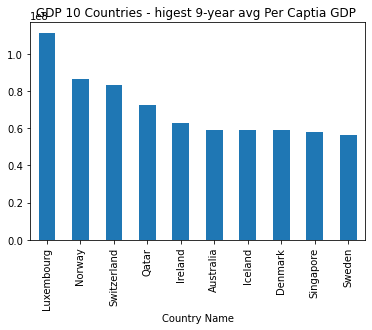

In [33]:
decadePerCapavg['PER_CAPITA_GDP'].plot.bar(title = 'GDP 10 Countries - higest 9-year avg Per Captia GDP ')


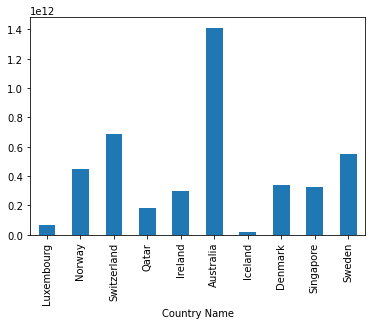

In [34]:
decadePerCapavg['GDP'].plot.bar()

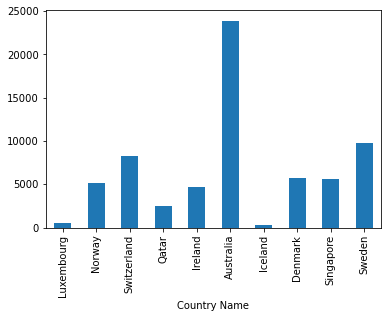

In [35]:
decadePerCapavg['PopTotal'].plot.bar()

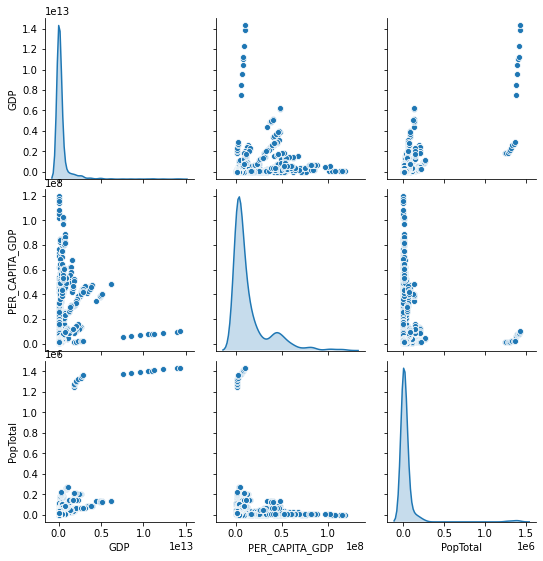

In [37]:
scatter = merged.pivot_table(index=['Country Name','Time'])
#scatter
sns.pairplot(scatter[['GDP','PER_CAPITA_GDP','PopTotal']],diag_kind = 'kde')

In [38]:
decadeavgPop = decadeavg.mean(level = "Country Name").sort_values('PopTotal', ascending = False)[:10]


popG = decadeavgPop.unstack()['GDP']
popP = decadeavgPop.unstack()['PopTotal']
popC = decadeavgPop.unstack()['PER_CAPITA_GDP']
popg = popG.T
popp = popP.T
popc = popC.T

In [39]:
decadeavgPop

,GDP,PER_CAPITA_GDP,PopTotal
Country Name,,,
China,1.099698e+13,7.801933e+06,1.406155e+06
India,2.242887e+12,1.706138e+06,1.309435e+06
Indonesia,9.537733e+11,3.690486e+06,2.581542e+05
Brazil,2.155131e+12,1.057738e+07,2.043988e+05
Pakistan,2.622353e+11,1.308903e+06,1.996605e+05
Nigeria,4.527150e+11,2.513971e+06,1.814460e+05
Bangladesh,2.030761e+11,1.290364e+06,1.562110e+05
Russian Federation,1.798874e+12,1.242349e+07,1.448982e+05
Japan,5.175806e+12,4.047242e+07,1.278577e+05


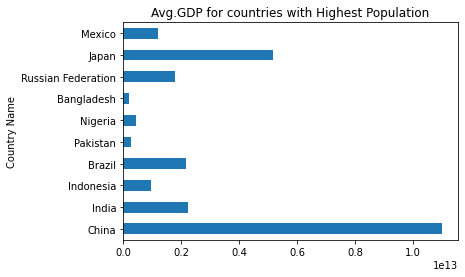

In [40]:
popG.plot.barh(title = 'Avg.GDP for countries with Highest Population')





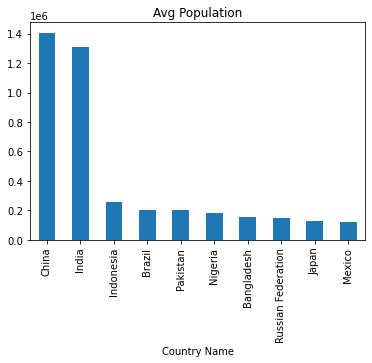

In [41]:
popP.plot.bar(title = 'Avg Population')

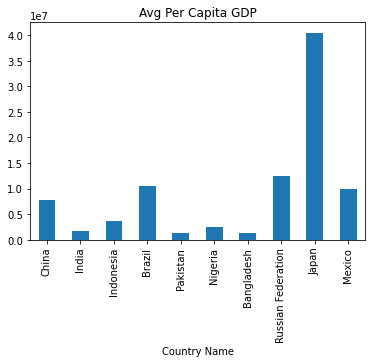

In [42]:

popC.plot.bar(title = 'Avg Per Capita GDP')